<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des Régions de Confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy d’un sous-problème de
régions de confiance (fichier `Pas_De_Cauchy.jl`). La spécification de cet algorithme est donnée ci-dessous.

In [2]:
using LinearAlgebra
using Documenter
using Markdown  
include("Pas_De_Cauchy.jl")
# @doc Pas_De_Cauchy

Pas_De_Cauchy

2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du Pas de Cauchy. Vous créerez pour cela un fichier `tester_pas_de_Cauchy.jl` dans le répertoire `test` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [3]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/tester_pas_de_cauchy.jl")
include("../src/Pas_De_Cauchy.jl")


@testset "Test rc avec cauchy" begin
	tester_pas_de_cauchy(Pas_De_Cauchy)
end;

Test Summary:       | Pass  Total  Time
Test rc avec cauchy |   10     10  1.0s


3. Coder l'algorithme des Régions de Confiance (fichier `Regions_De_Confiance.jl`). Sa spécification est donnée ci-dessous.

In [4]:
include("Regions_De_Confiance.jl")
# @doc Regions_De_Confiance

Regions_De_Confiance

4. Vérifier que les tests ci-dessous passent.

In [11]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Regions_De_Confiance.jl")

affiche = true

@testset "Test rc avec cauchy" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x011 :
  * xsol = [1.0000558873349883, 0.999992420017735, 0.9999289527004819]
  * f(xsol) = 9.090411079109608e-9
  * nb_iters = 26
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x012 :
  * xsol = [1.000049795462743, 0.9999961002424803, 0.9999424049876057]
  * f(xsol) = 6.0401046516733e-9
  * nb_iters = 28
  * flag = 2
  * sol_exacte : [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x021 :
  * xsol = [0.9975992881494471, 0.9951970760647646]
  * f(xsol) = 5.768693452724001e-6
  * nb_iters = 3988
  * flag = 2
  * sol_exacte : [1, 1]
iters = 

864
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x022 :
  * xsol = [0.9961677295959247, 0.9923393628794702]
  * f(xsol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x023 :
  * xsol = [0.9980249833119488, 0.9960352320621435]
  * f(xsol) = 3.935418182296104e-6
  * nb_iters = 3198
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 1 au point initial x011 :
  * xsol = [1.0000000000000007, 1.0, 1.0000000000000002]
  * f(xsol) = 2.070759876205156e-30
  * nb_iters = 1
  * flag = 0
  * sol_exacte : [1, 1, 1]
---------------------------------------------------------

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit $$ f_{1} : \mathbf{R}^3 \rightarrow \mathbf{R}$$ $$ (x_1,x_2, x_3) \mapsto  2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2$$ Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de Newton et RC-Pas de Cauchy sur cette fonction.
* La série de Taylor à l'ordre 2 de $f_1$ nous donne l'approximation de  $f_1$  pour s petit  $f(x+s) = f(x) + (\nabla(f)(x))^Ts + (1/2)s^T\nabla^2(f)(x)s$. Ainsi, le pas de Cauchy permet donc de prendre en compte les autres directions autour de x car on reste à une distance de  $s$  de x. En revanche, Newton ne prend en compte que la direction de steepest descent. Les performances sont donc moins bonnes pour Newton car il ne prend pas en compte les autres directions. Si on utilise Newton, si le gradient coupe l'axe des abcisses en un point trop éloigné de la solution du problème de minimisation, l'algorithme de Newton diverge. Ainsi, l'algorithme de Pas de Cauchy est plus performant que Newton car il prend en compte les autres directions autour de x.

2.  Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

On peut jouer sur tous les autres paramètres de région de confiance ($\gamma_1$, $\gamma_2$, $\eta_1$, $\eta_2$, $\Delta_{max}$, `max_iter`).
Analyse des tests numériques:


Résolution numérique:

Plus on augmente gamma2, plus le processus est rapide,jusqu'à ce qu'on atteigne une certaine valeur et que la solution dépasse trop rapidement, il faut donc faire une itération pour revenor en arrière (on voit cette diminition dans la matrice).
On observe également qu'il est préférable d'augmenter la région de confiance initiale,.



In [19]:
include("../src/Regions_De_Confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../test/fonctions_de_tests.jl")

x0=[100,30,-22]
deltaMax= range(5,15,length=6)
gamma2= range(1.5,2.5,length=6)
retour= zeros(length(gamma2),length(deltaMax))
for i in 1:length(deltaMax)
    for j in 1:length(gamma2)
        D=deltaMax[i]
        G=gamma2[j]
        _,_,_,nb_iters=Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,x0,[D,0.5,G,0.25,0.75,2,1000,1e-15,1e-15,1e-2])
        retour[j,i]=nb_iters
    end

end
retour
    

6×6 Matrix{Float64}:
 44.0  53.0  54.0  57.0  77.0  74.0
 48.0  54.0  60.0  60.0  59.0  68.0
 49.0  42.0  60.0  61.0  76.0  76.0
 50.0  44.0  63.0  44.0  72.0  51.0
 51.0  43.0  60.0  60.0  67.0  62.0
 52.0  46.0  55.0  59.0  49.0  68.0

# Régions de confiance avec Gradient Conjugué
## Implémentation 

1. Implémenter l’algorithme du Gradient Conjugué Tronqué (fichier `Gradient_Conjugue_Tronque.jl`). Sa spécification est donnée ci-dessous.

In [6]:
include("Gradient_Conjugue_Tronque.jl")
# @doc Gradient_Conjugue_Tronque

Gradient_Conjugue_Tronque (generic function with 1 method)

2. Vérifier que les tests ci-dessous passent.

In [9]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_gct.jl")
include("../src/Gradient_Conjugue_Tronque.jl")

affiche = true

@testset "Test gct" begin
	tester_gct(affiche,Gradient_Conjugue_Tronque)
end;

Test Summary: | Pass  Total  Time
Test gct      |    9      9  0.2s


3. Intégrer l’algorithme du Gradient Conjugué Tronqué dans le code de régions de confiance (fichier `Regions_De_Confiance.jl`).

4. Décommenter les tests avec le gradient conjugué dans `tester_regions_de_confiance.jl` et vérifier que les tests passent.

In [10]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_regions_de_confiance.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

affiche = true

@testset "Test rc avec cauchy et gct" begin
	tester_regions_de_confiance(affiche,Regions_De_Confiance)
end;

-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x011 :
  * xsol = [1.0000558873349883, 0.999992420017735, 0.9999289527004819]
  * f(xsol) = 9.090411079109608e-9
  * nb_iters = 26
  * flag = 2
  * sol_exacte : [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 1 au point initial x012 :
  * xsol = [1.000049795462743, 0.9999961002424803, 0.9999424049876057]
  * f(xsol) = 6.0401046516733e-9
  * nb_iters = 28
  * flag = 2
  * sol_exacte : [1, 1, 1]


-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x021 :
  * xsol = [0.9975992881494471, 0.9951970760647646]
  * f(xsol) = 5.768693452724001e-6
  * nb_iters = 3988
  * flag = 2
  * sol_exacte : [1, 1]
iters = 

864
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x022 :
  * xsol = [0.9961677295959247, 0.9923393628794702]
  * f(xsol) = 1.4697922915267688e-5
  * nb_iters = 864
  * flag = 0
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec cauchy appliqué à fonction 2 au point initial x023 :
  * xsol = [0.9980249833119488, 0.9960352320621435]
  * f(xsol) = 3.935418182296104e-6
  * nb_iters = 3198
  * flag = 2
  * sol_exacte : [1, 1]
-------------------------------------------------------------------------
Résultats de : régions de confiance avec gct appliqué à fonction 1 au point initial x011 :
  * xsol = [1.0000000000000007, 1.0, 1.0000000000000002]
  * f(xsol) = 2.070759876205156e-30
  * nb_iters = 1
  * flag = 0
  * sol_exacte : [1, 1, 1]
---------------------------------------------------------

## Interprétation  

1. Comparer la décroissance obtenue avec celle du pas de Cauchy, en imposant la sortie
dans l’algorithme au bout d’une itération seulement. Vous donnerez ci-après des résultats numériques. 

 :

    1. Que remarquez vous ?
    
    On remarque que l'on obtient les mêmes résultats pour le pas de Cauchy et le gradient conjugué tronqué. En effet, avec une itération, les deux algorithme sont équivalents.
    
    2. Comparer la décroissance obtenue avec celle du pas de Cauchy dans le cas général.
    
    Dans le cas général, on observe que le minimum calculé avec le gradient conjugué tronqué sans limiter à une itération la boucle est plus bas que celui obtenu par le pas de Cauchy.  

3. Quels sont les avantages et inconvénients des deux approches ?


La première approche avec le pas de Cauchy est plus efficace en temps de calcul que celle du gradient conjugué tronqué car c'est un calcul direct, mais la seconde approche est plus précise dans le calcul de la solution s renvoyée. En effet, le gradient conjugué tronqué permet de calculer la solution s en prenant en compte les autres directions autour de x. Ainsi, le gradient conjugué tronqué est plus précis que le pas de Cauchy.


[8.532423208191126, 91.70805308544246, 19.63221788549697, 591198.8755806963, 0.04937499999548001][8.532423208191126, 91.70805308544246, 19.63221788549697, 591198.8755806963, 0.04937499999548001]

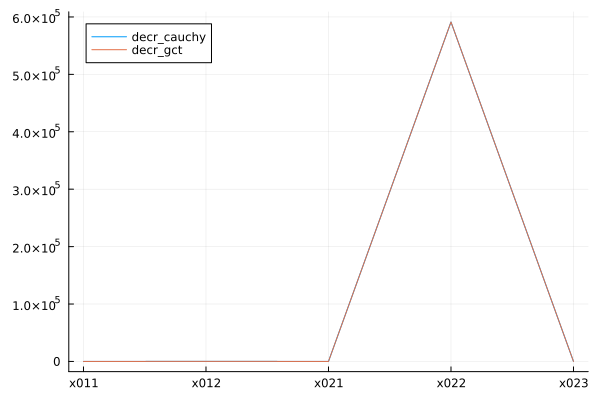

In [21]:
using Plots 

include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

tol_erreur = 1e-2
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 15
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 1
delta0_1 = 2
delta0_2 = 2
options1 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
options2 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_2,maxits,Tol_abs,Tol_rel,epsilon]


x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x022,options2)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options2)

decr_cauchy = [(fct1(pts1.x011) - fmin11), (fct1(pts1.x012) - fmin12), (fct2(pts1.x021) - fmin21), (fct2(pts1.x022) - fmin22), (fct2(pts1.x023) - fmin23)]
print(decr_cauchy)

x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x022,options2)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options2)

decr_gct = [(fct1(pts1.x011) - fmin11), (fct1(pts1.x012) - fmin12), (fct2(pts1.x021) - fmin21), (fct2(pts1.x022) - fmin22), (fct2(pts1.x023) - fmin23)]
print(decr_gct)

plot(["x011","x012","x021","x022","x023"], [decr_cauchy, decr_gct], label=["decr_cauchy" "decr_gct"])
plot!(legend=:topleft)


[26, 28, 4602, 864, 3975][1, 3, 31, 45, 19]

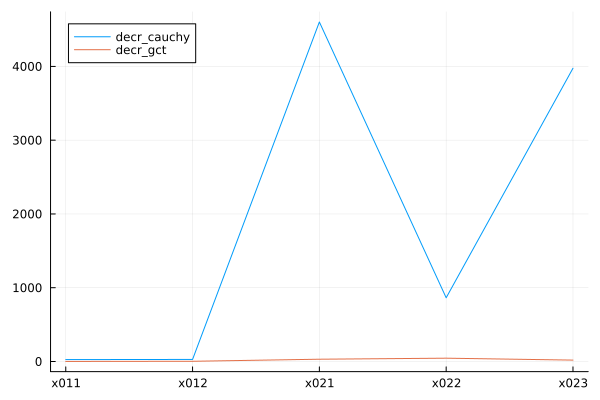

In [22]:
using Plots 

include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")

tol_erreur = 1e-2
gamma1 = 0.5
gamma2 = 2.00
eta1 = 0.25
eta2 = 0.75
deltaMax = 15
Tol_abs = sqrt(eps())
Tol_rel = 1e-8
epsilon = 1
maxits = 5000
delta0_1 = 2
delta0_2 = 2
options1 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_1,maxits,Tol_abs,Tol_rel,epsilon]
options2 =[deltaMax,gamma1,gamma2,eta1,eta2,delta0_2,maxits,Tol_abs,Tol_rel,epsilon]


x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("cauchy",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x022,options2)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("cauchy",fct2,grad_fct2,hess_fct2,pts1.x023,options2)

decr_cauchy = [nb_iters11, nb_iters12, nb_iters21, nb_iters22, nb_iters23]
print(decr_cauchy)

x_min11, fmin11, flag11, nb_iters11 = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x011,options1)
x_min12, fmin12, flag12, nb_iters12  = Regions_De_Confiance("gct",fct1,grad_fct1,hess_fct1,pts1.x012,options1)
x_min21, fmin21, flag21, nb_iters21,  = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x021,options2)
x_min22, fmin22, flag22, nb_iters22 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x022,options2)
x_min23, fmin23, flag23, nb_iters23 = Regions_De_Confiance("gct",fct2,grad_fct2,hess_fct2,pts1.x023,options2)

decr_gct = [nb_iters11, nb_iters12, nb_iters21, nb_iters22, nb_iters23]
print(decr_gct)

plot(["x011","x012","x021","x022","x023"], [decr_cauchy, decr_gct], label=["decr_cauchy" "decr_gct"])
plot!(legend=:topleft)
